In [1]:
import os
import numpy as np
import torch 
import pandas as pd
import cv2
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
seq1 = pd.read_csv('data/sequence-1/Seq1-Vis.txt', sep='\t', header=None)

In [4]:
#img1 = os
sorted(os.listdir('data/sequence-1/visual'))

['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg',
 '000010.jpg',
 '000011.jpg',
 '000012.jpg',
 '000013.jpg',
 '000014.jpg',
 '000015.jpg',
 '000016.jpg',
 '000017.jpg',
 '000018.jpg',
 '000019.jpg',
 '000020.jpg',
 '000021.jpg',
 '000022.jpg',
 '000023.jpg',
 '000024.jpg',
 '000025.jpg',
 '000026.jpg',
 '000027.jpg',
 '000028.jpg',
 '000029.jpg',
 '000030.jpg',
 '000031.jpg',
 '000032.jpg',
 '000033.jpg',
 '000034.jpg',
 '000035.jpg',
 '000036.jpg',
 '000037.jpg',
 '000038.jpg',
 '000039.jpg',
 '000040.jpg',
 '000041.jpg',
 '000042.jpg',
 '000043.jpg',
 '000044.jpg',
 '000045.jpg',
 '000046.jpg',
 '000047.jpg',
 '000048.jpg',
 '000049.jpg',
 '000050.jpg',
 '000051.jpg',
 '000052.jpg',
 '000053.jpg',
 '000054.jpg',
 '000055.jpg',
 '000056.jpg',
 '000057.jpg',
 '000058.jpg',
 '000059.jpg',
 '000060.jpg',
 '000061.jpg',
 '000062.jpg',
 '000063.jpg',
 '000064.jpg',
 '000065.jpg',
 '000066.jpg',
 '000067.j

In [5]:
def plot_image(img_path, img_id):
    img = cv2.imread(os.path.join(img_path, img_id))
    height, width, channels = img.shape
    rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(rgb_image)
    plt.show()
    
    
def plot_detections(img_path, img_id, detections):
    
    plt.figure(figsize=(10,10))
    img = cv2.imread(os.path.join(img_path, img_id))
    rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
    plt.imshow(rgb_image)  # plot the image for matplotlib
    currentAxis = plt.gca()

    #detections = y.data
    # scale each detection back up to the image
    scale = torch.Tensor(rgb_image.shape[1::-1]).repeat(2)
    for i in range(detections.size(0)):
        detection = detections[i]
        pt = detection.cpu().numpy()
        coords = (pt[0], pt[1]), pt[2], pt[3]
        color = colors[i]
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(pt[0], pt[1], 'annotated_person', bbox={'facecolor':color, 'alpha':0.5})
        
        
def write_detections_to_video(filename, frames, detections, fps, show=False):

    
    fps = max(1, fps)
    out = None

    try:
        for n, image in enumerate(frames, 1):
            frame = cv2.imread(image)
            if show:
                pass
#                 cv2.imshow('video', frame)
#                 plt.imshow(frame)  # plot the image for matplotlib
#                 currentAxis = plt.gca()
#                 plt.show()

            if not out:
                height, width, channels = frame.shape
                #out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, (width, height))
                out = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 15, (width, height))
#                     fourcc = cv2.VideoWriter_fourcc(*'mp4v')
#                     out = cv2.VideoWriter(filename, fourcc, 20, (width, height))

            for annotation in detections[n]:
                tl =  (int(annotation[3]), int(annotation[4]))
                wh = (int(annotation[5])+int(annotation[3]), int(annotation[6])+int(annotation[4]))
                cv2.rectangle(frame, tl, wh, (0,255,0),2)
            out.write(frame)

    finally:
        out and out.release()
        cv2.destroyAllWindows() 

In [6]:
frame_annotations = seq1.groupby([0]).apply(lambda x: x.values)

In [7]:
img_path = 'data/sequence-1/visual'
img_id = '000001.jpg'
detection = seq1.iloc[0][3:].tolist()
detections = [detection]
detections = torch.tensor(detections)

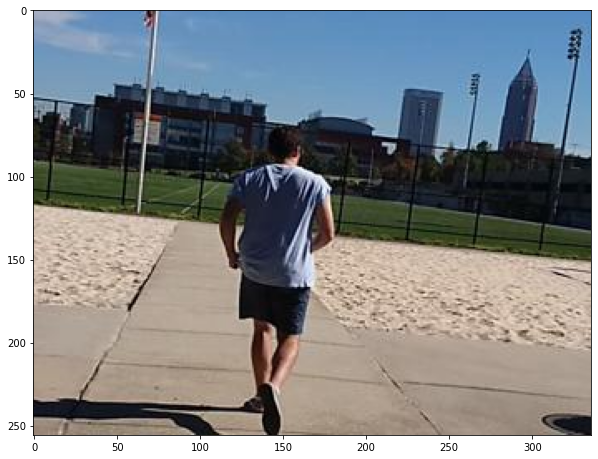

In [119]:
plot_image(img_path, img_id)

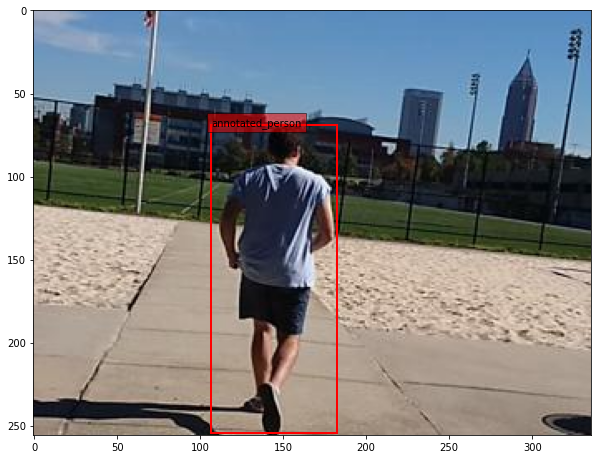

In [121]:
plot_detections(img_path, img_id, detections)

In [105]:
frames=[os.path.join(img_path, img_name) for img_name in sorted(os.listdir('data/sequence-1/visual'))]

In [106]:
write('tmp_video', frames, frame_annotations, 50)